In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import random
import xgboost as xgb
from scipy.stats import zscore
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import cross_validate
import pandas as pd
from pandas import read_csv
from scipy.stats import pearsonr
import math
from matplotlib import pyplot as plt
import statistics 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.metrics import matthews_corrcoef

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
data=read_csv("/content/drive/MyDrive/project6thsem/statlog.xls")
data=pd.DataFrame(data)
df=data
df['presence'] = df['presence'].replace([1],0)
df['presence'] = df['presence'].replace([2],1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [ ]:
attribute={}
for i in range(len(df.columns)):
  attribute[df.columns[i]]=i;

attribute

{'age': 0,
 'ca': 11,
 'chol': 4,
 'cp': 2,
 'exang': 8,
 'fbs': 5,
 'oldpeak': 9,
 'presence': 13,
 'restecg': 6,
 'sex': 1,
 'slope': 10,
 'thal': 12,
 'thalach': 7,
 'trestbps': 3}

In [ ]:
no_attribute={}
for i in attribute:
  no_attribute[attribute[i]]=i

no_attribute

{0: 'age',
 1: 'sex',
 2: 'cp',
 3: 'trestbps',
 4: 'chol',
 5: 'fbs',
 6: 'restecg',
 7: 'thalach',
 8: 'exang',
 9: 'oldpeak',
 10: 'slope',
 11: 'ca',
 12: 'thal',
 13: 'presence'}

In [ ]:
data=np.array(df)
data

array([[70.,  1.,  4., ...,  3.,  3.,  1.],
       [67.,  0.,  3., ...,  0.,  7.,  0.],
       [57.,  1.,  2., ...,  0.,  7.,  1.],
       ...,
       [56.,  0.,  2., ...,  0.,  3.,  0.],
       [57.,  1.,  4., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  1.]])

In [ ]:
class_count={}
for ind in df.index:
  if(df['presence'][ind] in class_count):
    class_count[df['presence'][ind]]+=1
  else:
    class_count[df['presence'][ind]]=1

class_count

{0: 150, 1: 120}

**1.Data Preprocessing**

In [ ]:
data_attr=[[] for i in range(14)]
for i in range(len(data)):
  for j in range(14):
    data_attr[j].append(data[i][j])

feature=[[] for i in range(13)]
for i in range(len(data)):
  for j in range(13):
    feature[j].append(data[i][j])

In [ ]:
feature_pos=[[] for i in range(13)]
for i in range(len(data)):
  for j in range(13):
    if(data[i][13]==1):
      feature_pos[j].append(data[i][j])
feature_neg=[[] for i in range(13)]
for i in range(len(data)):
  for j in range(13):
    if(data[i][13]==0):
      feature_neg[j].append(data[i][j])
print("Attribute","Mean(Present)","stddev(Present)","Mean(Absent)","stddev(Absent)")
for i in range(len(feature)):
  print(no_attribute[i],statistics.mean(feature_pos[i]),statistics.stdev(feature_pos[i]),statistics.mean(feature_neg[i]),statistics.stdev(feature_neg[i]))

Attribute Mean(Present) stddev(Present) Mean(Absent) stddev(Absent)
age 56.59166666666667 8.116272515867164 52.70666666666666 9.509830072559055
sex 0.8333333333333334 0.3742405942825599 0.5533333333333333 0.4988129084871181
cp 3.6166666666666667 0.7798225755258178 2.82 0.9273618495495703
trestbps 134.44166666666666 19.095424166266532 128.86666666666667 16.457660408750506
chol 256.46666666666664 47.96916610030388 244.21333333333334 54.01908520139457
fbs 0.14166666666666666 0.35017002672851316 0.15333333333333332 0.3615155768487031
restecg 1.225 0.9741404312684763 0.86 0.9900850753222367
thalach 138.85833333333332 23.130719445638285 158.33333333333334 19.2833574545606
exang 0.55 0.4995796552430584 0.15333333333333332 0.3615155768487031
oldpeak 1.5841666666666667 1.2820673846219959 0.6226666666666667 0.8008507780355149
slope 1.8166666666666667 0.5648430038936652 1.4 0.590756539185648
ca 1.15 1.0342861785597175 0.2866666666666667 0.6485571664936645
thal 5.833333333333333 1.7696476092896083

Data correlation by utilizing
Pearson’s Correlation Coefficient (PCC) can be used as a calculation tool to determine the relationship between attributes.
PCC varies from −1 to +1, with a positive and a negative value indicating a highly positive and highly negative
correlation between the variables, respectively, and a value
close to zero indicating a low correlation between them.

In [ ]:
# Pearson’s Correlation Coefficient (PPC)
PCC=[[0 for i in range(14)] for i in range(14)]
for i in range(14):
  for j in range(14):
    corr, _ = pearsonr(data_attr[i], data_attr[j])
    PCC[i][j]=corr

for i in range(14):
  print(no_attribute[i],end=" ")
print()
for i in range(14):
  
  for j in range(14):
    if(PCC[i][j]<0):
      print("%.2f"%PCC[i][j],end=" ")
    else:
      print("%.3f"%PCC[i][j],end=" ")
  print()


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal presence 
1.000 -0.09 0.097 0.273 0.220 0.123 0.128 -0.40 0.098 0.194 0.160 0.356 0.106 0.212 
-0.09 1.000 0.035 -0.06 -0.20 0.042 0.039 -0.08 0.180 0.097 0.051 0.087 0.391 0.298 
0.097 0.035 1.000 -0.04 0.090 -0.10 0.074 -0.32 0.353 0.167 0.137 0.226 0.263 0.417 
0.273 -0.06 -0.04 1.000 0.173 0.156 0.116 -0.04 0.083 0.223 0.142 0.086 0.132 0.155 
0.220 -0.20 0.090 0.173 1.000 0.025 0.168 -0.02 0.078 0.028 -0.01 0.127 0.029 0.118 
0.123 0.042 -0.10 0.156 0.025 1.000 0.053 0.022 -0.00 -0.03 0.044 0.124 0.049 -0.02 
0.128 0.039 0.074 0.116 0.168 0.053 1.000 -0.07 0.095 0.120 0.161 0.114 0.007 0.182 
-0.40 -0.08 -0.32 -0.04 -0.02 0.022 -0.07 1.000 -0.38 -0.35 -0.39 -0.27 -0.25 -0.42 
0.098 0.180 0.353 0.083 0.078 -0.00 0.095 -0.38 1.000 0.275 0.256 0.153 0.321 0.419 
0.194 0.097 0.167 0.223 0.028 -0.03 0.120 -0.35 0.275 1.000 0.610 0.255 0.324 0.418 
0.160 0.051 0.137 0.142 -0.01 0.044 0.161 -0.39 0.256 0.610 1.000 0

The attributes **chol and fbs** are seen to have a correlation that is close to 0 toward the attribute class, which suggests that both only have a small or even no correlation with the attribute class. Thus, we could possibly remove these features to improve the performance of our proposed model.

**Attribute selection by using the
Information Gain**

In [ ]:
def entropy_func(c, n):
    """
    The math formula
    """
    return -(c*1.0/n)*math.log(c*1.0/n, 2)

In [ ]:
def entropy_cal(c1, c2):
    """
    Returns entropy of a group of data
    c1: count of one class
    c2: count of another class
    """
    if c1== 0 or c2 == 0:  # when there is only one class in the group, entropy is 0
        return 0
    return entropy_func(c1, c1+c2) + entropy_func(c2, c1+c2)

In [ ]:
def get_entropy(y_predict, y_real):
    """
    Returns entropy of a split
    y_predict is the split decision, True/Fasle, and y_true can be multi class
    """

    
    if len(y_predict) != len(y_real):
        print('They have to be the same length')
        return None
    n = len(y_real)
    
    y_real=np.array(y_real)
    y_predict=np.array(y_predict)
    
    s_true, n_true = entropy_of_one_division(y_real[y_predict]) # left hand side entropy
    s_false, n_false = entropy_of_one_division(y_real[~y_predict]) # right hand side entropy
    s = n_true*1.0/n * s_true + n_false*1.0/n * s_false # overall entropy, again weighted average
    return s

In [ ]:
def entropy_of_one_division(division): 
    """
    Returns entropy of a divided group of data
    Data may have multiple classes
    """
    s = 0
    n = len(division)
    
    classes = set(division)
    for c in classes:   # for each class, get entropy
        n_c = sum(division==c)
        e = n_c*1.0/n * entropy_cal(sum(division==c), sum(division!=c)) # weighted avg
        s += e
    return s, n

In [ ]:
def find_best_split( col, y):
  """
  col: the column we split on
  y: target var
  """
  
  min_entropy = 10    
  n = len(y)
  
  for value in set(col):  # iterating through each value in the column
    y_predict = col < value  # separate y into 2 groups
    my_entropy = get_entropy(y_predict, y)  # get entropy of this split
    if my_entropy <= min_entropy:  # check if it's the best one so far
      min_entropy = my_entropy
      cutoff = value
  return min_entropy, cutoff

In [ ]:
c_0=0
c_1=0

for i in data_attr[13]:
  if i==0:
    c_0+=1
  else:
    c_1+=1

Entropy_data=entropy_cal(c_0,c_1)
print("Entropy of class ==> ",Entropy_data)

Entropy of class ==>  0.9910760598382222


In [ ]:
info_gain={}
for i in range(13):
  entropy, cur_cutoff = find_best_split(data_attr[i], data_attr[13])
  info_gain[no_attribute[i]]=Entropy_data-entropy


In [ ]:
info_gain

{'age': 0.05672632009905432,
 'ca': 0.1659164193125583,
 'chol': 0.02679862946250755,
 'cp': 0.19037495339473776,
 'exang': 0.12991471274856292,
 'fbs': 0.00019260538564003227,
 'oldpeak': 0.1196483125127088,
 'restecg': 0.02412907518542795,
 'sex': 0.06689559647846699,
 'slope': 0.1099167059149444,
 'thal': 0.20303023637594242,
 'thalach': 0.12028047701731959,
 'trestbps': 0.01642730413426674}

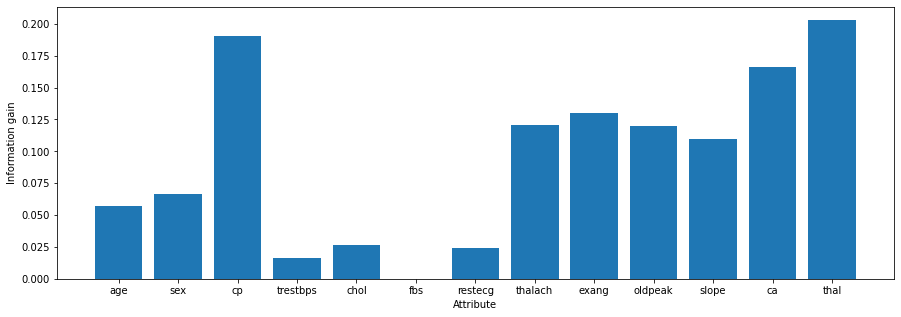

In [ ]:
temp1=[]
temp2=[]

for i in info_gain:
  temp1.append(i)
  temp2.append(info_gain[i])

fig = plt.figure(figsize = (15, 5)) 
plt.ylabel("Information gain")
plt.xlabel("Attribute")
plt.bar(temp1,temp2)
plt.show()

As we can see the information gain of attribute **fbs,trestbps,chol,restecg** is very close to 0 . So, we can remove these feature.

In [ ]:
df=df.drop(['fbs', 'trestbps','chol'], axis=1)
df

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
266,44.0,1.0,2.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
267,56.0,0.0,2.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
268,57.0,1.0,4.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


**Outlier detection and removal using DBSCAN**

In [ ]:
def DBSCAN(d,eps,minpts):
  cluster=[]
  uncluster=[]
  visited={}
  for i in d:
    visited[i]=-1
  
  for sp in d:
    if(visited[sp]==-1):
      visited[sp]=1
      count=0

      neighbor=[]
      for i in range(len(d)):
        if d[i]!=sp:
          dist=np.sqrt(np.sum(np.square(np.array(d[i]) - np.array(sp))))
          if(dist<=eps):
            neighbor.append(d[i])
            count+=1
      if(count<minpts):
        uncluster.append(sp)
      else:
        cluster.append(sp)
        for i in neighbor:
          if visited[i]==-1:
            visited[i]=1
            neighbor_=[]
            count_=0
            for j in range(len(d)):
              if d[j]!=i:
                dist=np.sqrt(np.sum(np.square(np.array(d[j]) - np.array(i))))
                if(dist<=eps):
                  neighbor_.append(d[j])
                  count_+=1
            if(count_>=minpts):
              neighbor=neighbor+neighbor_
          if((i not in cluster) and (i not in uncluster)):
            cluster.append(i)

  return cluster,uncluster  
          

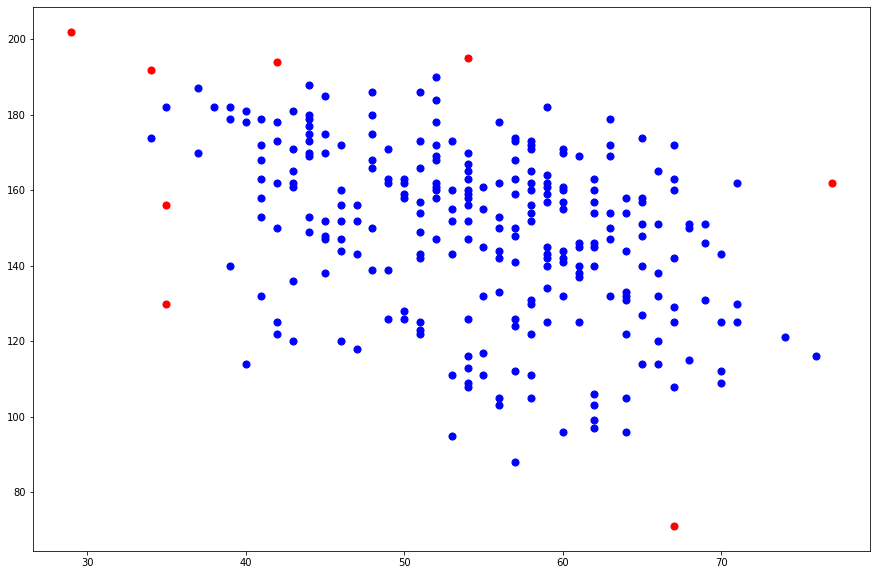

In [ ]:
points=[]
for i in range(len(data)):
  a=data_attr[attribute['age']][i]
  b=data_attr[attribute['thalach']][i]
  points.append((a,b))
  
C,UC=DBSCAN(points,9,5)

fig = plt.figure(figsize = (15, 10))
x=[]
y=[]
for i in C:
  x.append(i[0])
  y.append(i[1])

plt.scatter(x,y, color="blue",marker="o", s=50)
x=[]
y=[]
for i in UC:
  x.append(i[0])
  y.append(i[1])
plt.scatter(x,y, color="red",marker="o", s=50)
plt.show()

In [ ]:
index=[]
for i in range(len(data)):
  f=0
  for j in UC:
    if(data[i][attribute['age']]==j[0] and data[i][attribute['thalach']]==j[1]):
      f=1
  if(f==1):
    index.append(i)

index

[81, 101, 138, 144, 180, 193, 199, 214]

In [ ]:
df.drop(index, inplace = True) 
 

In [ ]:
df

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
266,44.0,1.0,2.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
267,56.0,0.0,2.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
268,57.0,1.0,4.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [ ]:
data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

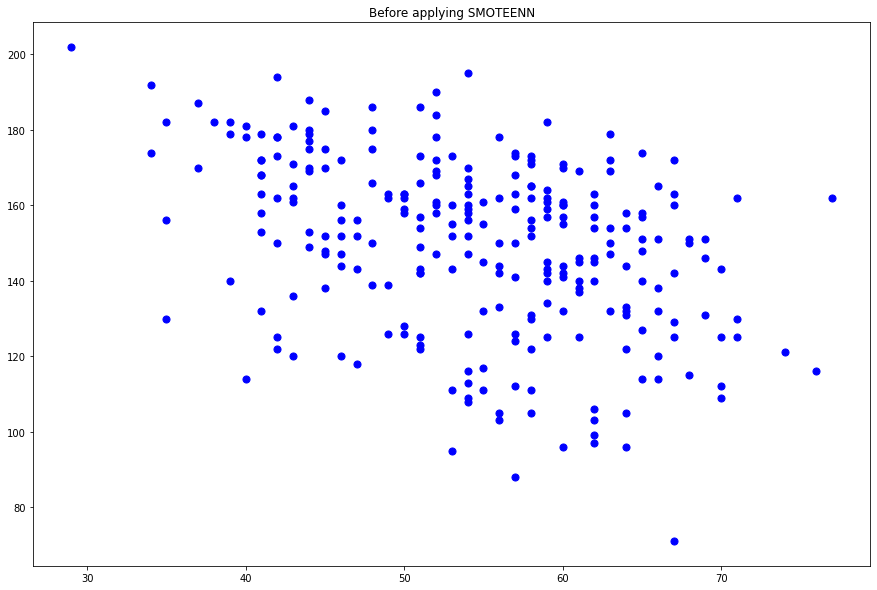

In [ ]:
x=[]
y=[]
for i in range(len(d1)):
  x.append(data_attr[attribute['age']][i])
  y.append(data_attr[attribute['thalach']][i])
fig = plt.figure(figsize = (15, 10))
plt.title("Before applying SMOTEENN")
plt.scatter(x,y, color="blue",marker="o", s=50)
plt.show()

In [ ]:
data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
d1, d2 = smenn.fit_resample(d1, d2)

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

# fit model no training data
model =XGBClassifier(
 learning_rate =0.002447146072603612,
 n_estimators=5000,
 max_depth=1,
 min_child_weight=1,
 gamma=0.0024674117613464074,
 subsample=1.0,
 colsample_bytree=1e-06,
 objective= 'binary:logistic',
  reg_alpha=0.015474296722426327,
  reg_lambda=1
 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

[[20  0]
 [ 2 18]]
Accuracy: 95.00%
F1 Score: 0.9473684210526316
Recall score: 0.9
Precision score: 1.0


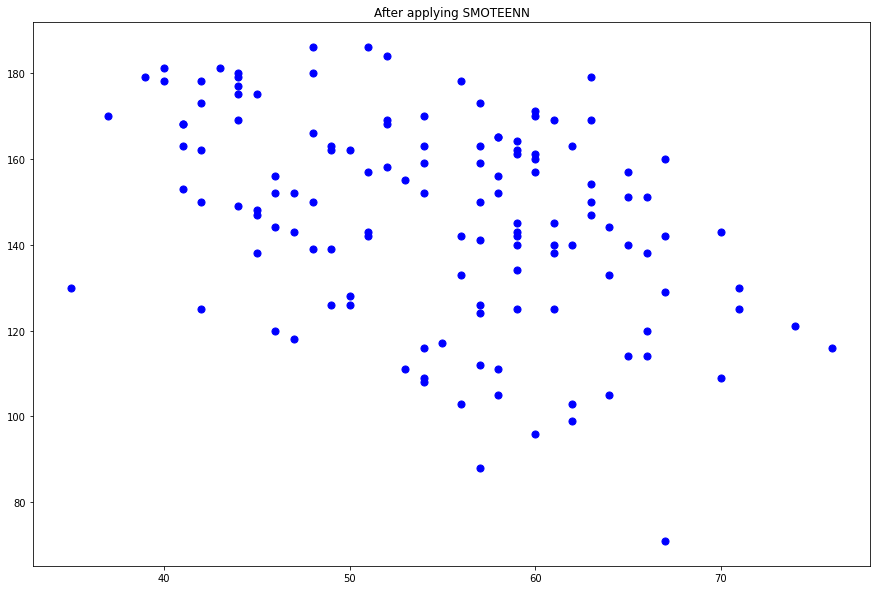

In [ ]:
fig = plt.figure(figsize = (15, 10))
x=[]
y=[]
for i in range(len(d1)):
  x.append(data_attr[attribute['age']][i])
  y.append(data_attr[attribute['thalach']][i])

plt.title("After applying SMOTEENN")
plt.scatter(x,y, color="blue",marker="o", s=50)
plt.show()

In [ ]:
!pip3 install scikit-optimize

     |████████████████████████████████| 102kB 4.4MB/s 


**Parameter tuning using GA**

In [ ]:
# manually tune svm model hyperparameters using skopt on the ionosphere dataset
from numpy import mean
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

# define the space of hyperparameters to search
search_space = list()
search_space.append(Real(1e-6, 1.0, 'log-uniform', name='learning_rate'))
search_space.append(Integer(1, 5000, name='n_estimators'))
search_space.append(Integer(1, 100, name='max_depth'))
search_space.append(Integer(1, 100, name='min_child_weight'))
search_space.append(Real(1e-6, 100.0, 'log-uniform', name='gamma'))
search_space.append(Real(1e-6, 1.0, 'log-uniform', name='subsample'))
search_space.append(Real(1e-6, 1.0, 'log-uniform', name='colsample_bytree'))
search_space.append(Categorical(['binary:logistic'], name='objective'))
search_space.append(Categorical(['auc','rmse'], name='eval_metric'))
search_space.append(Real(1e-6, 1.0, 'log-uniform', name='reg_alpha'))
search_space.append(Real(1e-6, 1.0, 'log-uniform', name='reg_lambda'))



# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = XGBClassifier()
	model.set_params(**params)
	# define test harness
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring='accuracy')
	# calculate the mean of the scores
	estimate = mean(result)
	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


print(X.shape, y.shape)
# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

(184, 10) (184,)
Best Accuracy: 0.864
Best Parameters: [0.002447146072603612, 5000, 1, 1, 0.0024674117613464074, 1.0, 1e-06, 'binary:logistic', 'auc', 0.015474296722426327, 1.0]


**1.Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
M=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))
print("MCC:",matthews_corrcoef(y_test,predictions))
print("TPR(sensitivity):",M[0][0]/(M[0][0]+M[1][0]))
print("TNR(specificity):",M[1][1]/(M[1][1]+M[0][1]))
print("FPR:",M[1][0]/(M[0][0]+M[1][0]))
print("FNR:",M[0][1]/(M[1][1]+M[0][1]))

[[37  7]
 [ 8 27]]
Accuracy: 81.01%
F1 Score: 0.782608695652174
Recall score: 0.7714285714285715
Precision score: 0.7941176470588235
MCC: 0.6143355066745336
TPR(sensitivity): 0.8222222222222222
TNR(specificity): 0.7941176470588235
FPR: 0.17777777777777778
FNR: 0.20588235294117646


**2.Linear Regression**

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

reg.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
M=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))
print("MCC:",matthews_corrcoef(y_test,predictions))
print("TPR(sensitivity):",M[0][0]/(M[0][0]+M[1][0]))
print("TNR(specificity):",M[1][1]/(M[1][1]+M[0][1]))
print("FPR:",M[1][0]/(M[0][0]+M[1][0]))
print("FNR:",M[0][1]/(M[1][1]+M[0][1]))

[[38  3]
 [10 28]]
Accuracy: 83.54%
F1 Score: 0.8115942028985507
Recall score: 0.7368421052631579
Precision score: 0.9032258064516129
MCC: 0.6791025269486367
TPR(sensitivity): 0.7916666666666666
TNR(specificity): 0.9032258064516129
FPR: 0.20833333333333334
FNR: 0.0967741935483871


**3.Multi Layer perceptron (MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300)

data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
M=confusion_matrix(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))
print("MCC:",matthews_corrcoef(y_test,predictions))
print("TPR(sensitivity):",M[0][0]/(M[0][0]+M[1][0]))
print("TNR(specificity):",M[1][1]/(M[1][1]+M[0][1]))
print("FPR:",M[1][0]/(M[0][0]+M[1][0]))
print("FNR:",M[0][1]/(M[1][1]+M[0][1]))


[[39  6]
 [ 4 30]]
Accuracy: 87.34%
F1 Score: 0.8571428571428571
Recall score: 0.8823529411764706
Precision score: 0.8333333333333334
MCC: 0.7446521093409246
TPR(sensitivity): 0.9069767441860465
TNR(specificity): 0.8333333333333334
FPR: 0.09302325581395349
FNR: 0.16666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**4.Support Vector Machine**

In [ ]:
from sklearn.svm import SVC  
svm = SVC(kernel='linear') 

data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
M=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))
print("MCC:",matthews_corrcoef(y_test,predictions))
print("TPR(sensitivity):",M[0][0]/(M[0][0]+M[1][0]))
print("TNR(specificity):",M[1][1]/(M[1][1]+M[0][1]))
print("FPR:",M[1][0]/(M[0][0]+M[1][0]))
print("FNR:",M[0][1]/(M[1][1]+M[0][1]))

[[31  6]
 [ 9 33]]
Accuracy: 81.01%
F1 Score: 0.8148148148148148
Recall score: 0.7857142857142857
Precision score: 0.8461538461538461
MCC: 0.6223518296123182
TPR(sensitivity): 0.775
TNR(specificity): 0.8461538461538461
FPR: 0.225
FNR: 0.15384615384615385


**5.Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
M=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))
print("MCC:",matthews_corrcoef(y_test,predictions))
print("TPR(sensitivity):",M[0][0]/(M[0][0]+M[1][0]))
print("TNR(specificity):",M[1][1]/(M[1][1]+M[0][1]))
print("FPR:",M[1][0]/(M[0][0]+M[1][0]))
print("FNR:",M[0][1]/(M[1][1]+M[0][1]))

[[31 10]
 [ 9 29]]
Accuracy: 75.95%
F1 Score: 0.7532467532467534
Recall score: 0.7631578947368421
Precision score: 0.7435897435897436
MCC: 0.5189224928980203
TPR(sensitivity): 0.775
TNR(specificity): 0.7435897435897436
FPR: 0.225
FNR: 0.2564102564102564


**6.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)

data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
M=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))
print("MCC:",matthews_corrcoef(y_test,predictions))
print("TPR(sensitivity):",M[0][0]/(M[0][0]+M[1][0]))
print("TNR(specificity):",M[1][1]/(M[1][1]+M[0][1]))
print("FPR:",M[1][0]/(M[0][0]+M[1][0]))
print("FNR:",M[0][1]/(M[1][1]+M[0][1]))

[[40  5]
 [ 6 28]]
Accuracy: 86.08%
F1 Score: 0.8358208955223881
Recall score: 0.8235294117647058
Precision score: 0.8484848484848485
MCC: 0.7152286401673877
TPR(sensitivity): 0.8695652173913043
TNR(specificity): 0.8484848484848485
FPR: 0.13043478260869565
FNR: 0.15151515151515152


**7.Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(random_state=0)

data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

Lr.fit(X_train, y_train)
y_pred =Lr.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
M=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))
print("MCC:",matthews_corrcoef(y_test,predictions))
print("TPR(sensitivity):",M[0][0]/(M[0][0]+M[1][0]))
print("TNR(specificity):",M[1][1]/(M[1][1]+M[0][1]))
print("FPR:",M[1][0]/(M[0][0]+M[1][0]))
print("FNR:",M[0][1]/(M[1][1]+M[0][1]))

[[39  4]
 [ 8 28]]
Accuracy: 84.81%
F1 Score: 0.823529411764706
Recall score: 0.7777777777777778
Precision score: 0.875
MCC: 0.6946986724710321
TPR(sensitivity): 0.8297872340425532
TNR(specificity): 0.875
FPR: 0.1702127659574468
FNR: 0.125


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**8.K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

neigh.fit(X_train, y_train)
y_pred =neigh.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
M=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))
print("MCC:",matthews_corrcoef(y_test,predictions))
print("TPR(sensitivity):",M[0][0]/(M[0][0]+M[1][0]))
print("TNR(specificity):",M[1][1]/(M[1][1]+M[0][1]))
print("FPR:",M[1][0]/(M[0][0]+M[1][0]))
print("FNR:",M[0][1]/(M[1][1]+M[0][1]))

[[31 14]
 [10 24]]
Accuracy: 69.62%
F1 Score: 0.6666666666666667
Recall score: 0.7058823529411765
Precision score: 0.631578947368421
MCC: 0.39120779213522416
TPR(sensitivity): 0.7560975609756098
TNR(specificity): 0.631578947368421
FPR: 0.24390243902439024
FNR: 0.3684210526315789


**9.K means cluster**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

kmeans.fit(X_train, y_train)
y_pred =kmeans.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
M=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))
print("MCC:",matthews_corrcoef(y_test,predictions))
print("TPR(sensitivity):",M[0][0]/(M[0][0]+M[1][0]))
print("TNR(specificity):",M[1][1]/(M[1][1]+M[0][1]))
print("FPR:",M[1][0]/(M[0][0]+M[1][0]))
print("FNR:",M[0][1]/(M[1][1]+M[0][1]))

[[36  8]
 [13 22]]
Accuracy: 73.42%
F1 Score: 0.6769230769230768
Recall score: 0.6285714285714286
Precision score: 0.7333333333333333
MCC: 0.4572665262529628
TPR(sensitivity): 0.7346938775510204
TNR(specificity): 0.7333333333333333
FPR: 0.2653061224489796
FNR: 0.26666666666666666


**10.K medoids**

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=2, random_state=0)

data=np.array(df)
d1=data[:,:-1]
d2=data[:,-1]

#split dataset to train and test
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

kmedoids.fit(X_train, y_train)
y_pred =kmedoids.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
M=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: {}".format(f1_score(y_test,predictions)))
print("Recall score: {}".format(recall_score(y_test,predictions)))
print("Precision score: {}".format(precision_score(y_test,predictions)))
print("MCC:",matthews_corrcoef(y_test,predictions))
print("TPR(sensitivity):",M[0][0]/(M[0][0]+M[1][0]))
print("TNR(specificity):",M[1][1]/(M[1][1]+M[0][1]))
print("FPR:",M[1][0]/(M[0][0]+M[1][0]))
print("FNR:",M[0][1]/(M[1][1]+M[0][1]))

     |████████████████████████████████| 624kB 5.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp37-cp37m-linux_x86_64.whl size=339924 sha256=59a57d9c259374f2967c66bea98ee8d7d283d11e7a9f374ca4bc6fdfddf4878d
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra
[[12 28]
 [28 11]]
Accuracy: 29.11%
F1 Score: 0.28205128205128205
Recall score: 0.28205128205128205
Precision score: 0.28205128205128205
MCC: -0.41794871794871796
TPR(sensitivity): 0.3
TNR(specificity): 0.28205128205128205
FPR: 0.7
FNR: 0.717948717948718


In [ ]:
itr=100
Acc=0
F1=0
Recall=0
Prec=0
MCC=0
TPR=0
TNR=0
FPR=0
FNR=0


for i in range(itr):
  
  data=np.array(df)
  d1=data[:,:-1]
  d2=data[:,-1]

  # oversampling the train dataset using SMOTE + ENN
  smenn = SMOTEENN()
  d1, d2 = smenn.fit_resample(d1, d2)

  #split dataset to train and test
  test_size = 0.30
  X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=test_size, shuffle=True)

  # fit model no training data
  model =XGBClassifier(
  learning_rate =0.002447146072603612,
  n_estimators=5000,
  max_depth=1,
  min_child_weight=1,
  gamma=0.0024674117613464074,
  subsample=1.0,
  colsample_bytree=1e-06,
  objective= 'binary:logistic',
    reg_alpha=0.015474296722426327,
    reg_lambda=1
  )
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)


  M=confusion_matrix(y_test, predictions)
  # print(confusion_matrix(y_test, predictions))
  Acc=Acc + accuracy * 100.0
  F1=F1+ f1_score(y_test,predictions)
  Recall= Recall + recall_score(y_test,predictions)
  Prec =Prec + precision_score(y_test,predictions)
  MCC=MCC+matthews_corrcoef(y_test,predictions)
  TPR=TPR+ (M[0][0]/(M[0][0]+M[1][0]))
  TNR=TNR+ (M[1][1]/(M[1][1]+M[0][1]))
  FPR=FPR+ (M[1][0]/(M[0][0]+M[1][0]))
  FNR=FNR+ (M[0][1]/(M[1][1]+M[0][1]))

print("Accuracy: %.2f%%" % (Acc/itr))
print("F1 Score: {}".format(F1/itr))
print("Recall score: {}".format(Recall/itr))
print("Precision score: {}".format(Prec/itr))
print("MCC:",MCC/itr)
print("TPR(sensitivity):",TPR/itr)
print("TNR(specificity):",TNR/itr)
print("FPR:",FPR/itr)
print("FNR:",FNR/itr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Accuracy: 96.22%
F1 Score: 0.9591778911806937
Recall score: 0.9425891236084021
Precision score: 0.9789698231936619
MCC: 0.9249460610413067
TPR(sensitivity): 0.9482993561246486
TNR(specificity): 0.9789698231936619
FPR: 0.05170064387535108
FNR: 0.021030176806337796


In [ ]:
model =XGBClassifier(
 learning_rate =0.002447146072603612,
 n_estimators=5000,
 max_depth=1,
 min_child_weight=1,
 gamma=0.0024674117613464074,
 subsample=1.0,
 colsample_bytree=1e-06,
 objective= 'binary:logistic',
  reg_alpha=0.015474296722426327,
  reg_lambda=1
 )
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1e-06,
              gamma=0.0024674117613464074, learning_rate=0.002447146072603612,
              max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
              n_estimators=5000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0,
              reg_alpha=0.015474296722426327, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1.0, verbosity=1)